In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = 'movie/test_data_solution.txt'

with open(file_path, 'r', errors="ignore") as files:
    content = files.read()

datas = content.strip().split('\n')

titles = []
genres = []
descriptions = []

for data in datas:
    parts = data.split(' ::: ')
    if len(parts) == 4:
        movie_id, title,genre, description = parts
        titles.append(title.strip())
        genres.append(genre.strip())
        descriptions.append(description.strip())

df = pd.DataFrame({
    'title': titles,
    'genre': genres,
    'description': descriptions
})

print(df.head()), df.shape

                         title        genre  \
0         Edgar's Lunch (1998)     thriller   
1    La guerra de papÃ¡ (1977)       comedy   
2  Off the Beaten Track (2010)  documentary   
3       Meu Amigo Hindu (2015)        drama   
4            Er nu zhai (1955)        drama   

                                         description  
0  L.R. Brane loves his life - his car, his apart...  
1  Spain, March 1964: Quico is a very naughty chi...  
2  One year in the life of Albin and his family o...  
3  His father has died, he hasn't spoken with his...  
4  Before he was known internationally as a marti...  


(None, (54200, 3))

In [3]:
t = df.genre.value_counts()
print(t["drama"])
t = np.array(t)
t[0]


13612


13612

<Axes: xlabel='genre'>

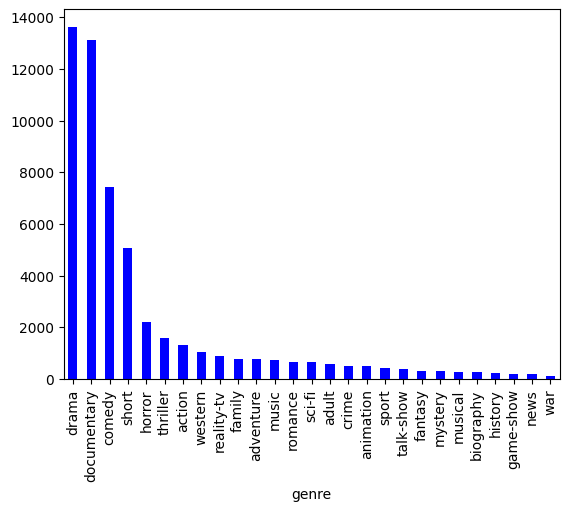

In [4]:
df.genre.value_counts().plot(kind="bar", color="b")

In [5]:
genre_list = set(df.genre.values)
genre_list = list(genre_list)
genre_list.remove("drama")
genre_list, len(genre_list)

(['thriller',
  'talk-show',
  'musical',
  'music',
  'adult',
  'animation',
  'reality-tv',
  'fantasy',
  'family',
  'western',
  'action',
  'news',
  'biography',
  'documentary',
  'adventure',
  'horror',
  'game-show',
  'mystery',
  'sport',
  'history',
  'comedy',
  'short',
  'romance',
  'sci-fi',
  'crime',
  'war'],
 26)

In [6]:
df1 = df[df["genre"] == "drama"]
t = df1.shape[0]
t

13612

In [7]:
for i in genre_list:
    df_temp = df[df["genre"] == i]
    # print(df_temp.shape)
    samples=[]
    samples = df_temp.sample(t, replace=True)
    # print(samples.shape)
    # print(df1.shape)
    df1 = pd.concat([df1, samples], axis=0)
df1.genre.value_counts()

genre
drama          13612
documentary    13612
crime          13612
sci-fi         13612
romance        13612
short          13612
comedy         13612
history        13612
sport          13612
mystery        13612
game-show      13612
horror         13612
adventure      13612
biography      13612
thriller       13612
news           13612
action         13612
western        13612
family         13612
fantasy        13612
reality-tv     13612
animation      13612
adult          13612
music          13612
musical        13612
talk-show      13612
war            13612
Name: count, dtype: int64

In [8]:
X = df["description"]
y = df["genre"]
X.shape, y.shape

((54200,), (54200,))

In [9]:
y[:5]

0       thriller
1         comedy
2    documentary
3          drama
4          drama
Name: genre, dtype: object

In [10]:
import spacy

nlp = spacy.load("en_core_web_lg")

def processing(text):
    tokens = nlp(text)
    filtered_tokens = []
    for token in tokens:
        if token.is_stop:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [11]:
text = X[0]
processing(text)

'L.R. Brane love life - car , apartment , job , especially girlfriend , Vespa . day shower , Vespa run shampoo . L.R. run street convenience store buy , quick trip minute . return , Vespa go trace existence wipe . L.R. life torture existence strange event occur confirm mind conspiracy work find Vespa .'

In [12]:
T = df.description.apply(processing)

In [ ]:
T.shape

(54200,)

In [ ]:
len(X[0]), len(T[0])

(509, 302)

In [ ]:
def process(text):
    if(len(text) == 0):
        print("hari")
t = df["description"].apply(process)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features=5000)

test_data= tf.fit_transform(T)
test_data.shape

(54200, 5000)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(test_data, df["genre"], test_size=0.25, stratify=y, random_state=23)


In [ ]:
x_train.shape, x_test.shape, y_train.value_counts()

((40650, 5000),
 (13550, 5000),
 genre
 drama          10209
 documentary     9822
 comedy          5584
 short           3804
 horror          1653
 thriller        1193
 action           985
 western          774
 reality-tv       662
 family           587
 adventure        581
 music            548
 romance          504
 sci-fi           484
 adult            443
 crime            379
 animation        374
 sport            323
 talk-show        293
 fantasy          242
 mystery          239
 musical          207
 biography        198
 history          182
 game-show        145
 news             136
 war               99
 Name: count, dtype: int64)

In [ ]:
from sklearn.preprocessing import LabelEncoder
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)
y_train[:5], y_test[:5]

(array([24,  5, 13,  8,  5]), array([ 5, 17,  8, 13,  8]))

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5772693726937269

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
ran = RandomForestClassifier(n_estimators=100)

models = {
    "RandomForest" : ran,
    "LogisticRegression" : LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(gamma="auto", kernel="rbf"),
    "Naive Bayes": MultinomialNB()
}

In [ ]:
#Training the dataset with different types of models
scores = []
for name, var in models.items():
    var.fit(x_train, y_train)
    y_predict = var.predict(x_test)
    scores.append({
        "Model_name": name,
        "Test Accuracy": var.score(x_test, y_test), 
        # "Accuracy": accuracy_score(y_test,y_predict),
        "precision" : precision_score(y_test, y_predict, zero_division=0, average="weighted"),
        "recall" : recall_score(y_test, y_predict, average="weighted"),
        "f1_score" : f1_score(y_test, y_predict, average="weighted")
        
    })
df1 = pd.DataFrame(scores)
df1

,Model_name,Test Accuracy,precision,recall,f1_score
0,RandomForest,0.494170,0.517667,0.494170,0.414508
1,LogisticRegression,0.577269,0.553690,0.577269,0.536255
2,Support Vector Machine,0.251144,0.063073,0.251144,0.100825
3,Naive Bayes,0.519779,0.499779,0.519779,0.440217


In [ ]:
#we can see that logistic regression has the best accuracy comapring to others

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.5772693726937269

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.51      0.29      0.37       329
           1       0.60      0.19      0.29       147
           2       0.55      0.19      0.28       194
           3       0.43      0.05      0.09       124
           4       0.00      0.00      0.00        66
           5       0.51      0.58      0.54      1862
           6       0.27      0.03      0.06       126
           7       0.66      0.85      0.74      3274
           8       0.54      0.77      0.64      3403
           9       0.58      0.08      0.14       196
          10       0.00      0.00      0.00        80
          11       0.80      0.50      0.62        48
          12       0.00      0.00      0.00        61
          13       0.65      0.55      0.60       551
          14       0.67      0.47      0.55       183
          15       0.00      0.00      0.00        69
          16       0.50      0.01      0.02        79
          17       0.50    

h:\nlp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
h:\nlp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
h:\nlp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[  95,    0,    2,    0,    0,   37,    3,   37,  105,    0,    0,
           1,    0,   13,    0,    0,    0,    0,    1,    2,    6,   11,
           3,    0,   13,    0,    0],
       [   2,   28,   12,    0,    0,   50,    0,   11,   36,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    7,
           0,    0,    0,    0,    0],
       [  11,    5,   36,    2,    0,   28,    0,   34,   55,    0,    0,
           0,    0,    7,    0,    0,    0,    0,    1,    0,    1,   11,
           0,    0,    2,    0,    1],
       [   5,    0,    1,    6,    0,   42,    0,   20,   24,    2,    1,
           0,    0,    6,    0,    0,    0,    0,    0,    0,    3,   14,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    2,    0,   46,   14,    0,    0,
           0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    3,
           0,    0,    0,    0,    0],
       [  11,    2,    1,    0,    0, 1071,    3,  134,  530,    

Text(220.72222222222223, 0.5, 'Truth')

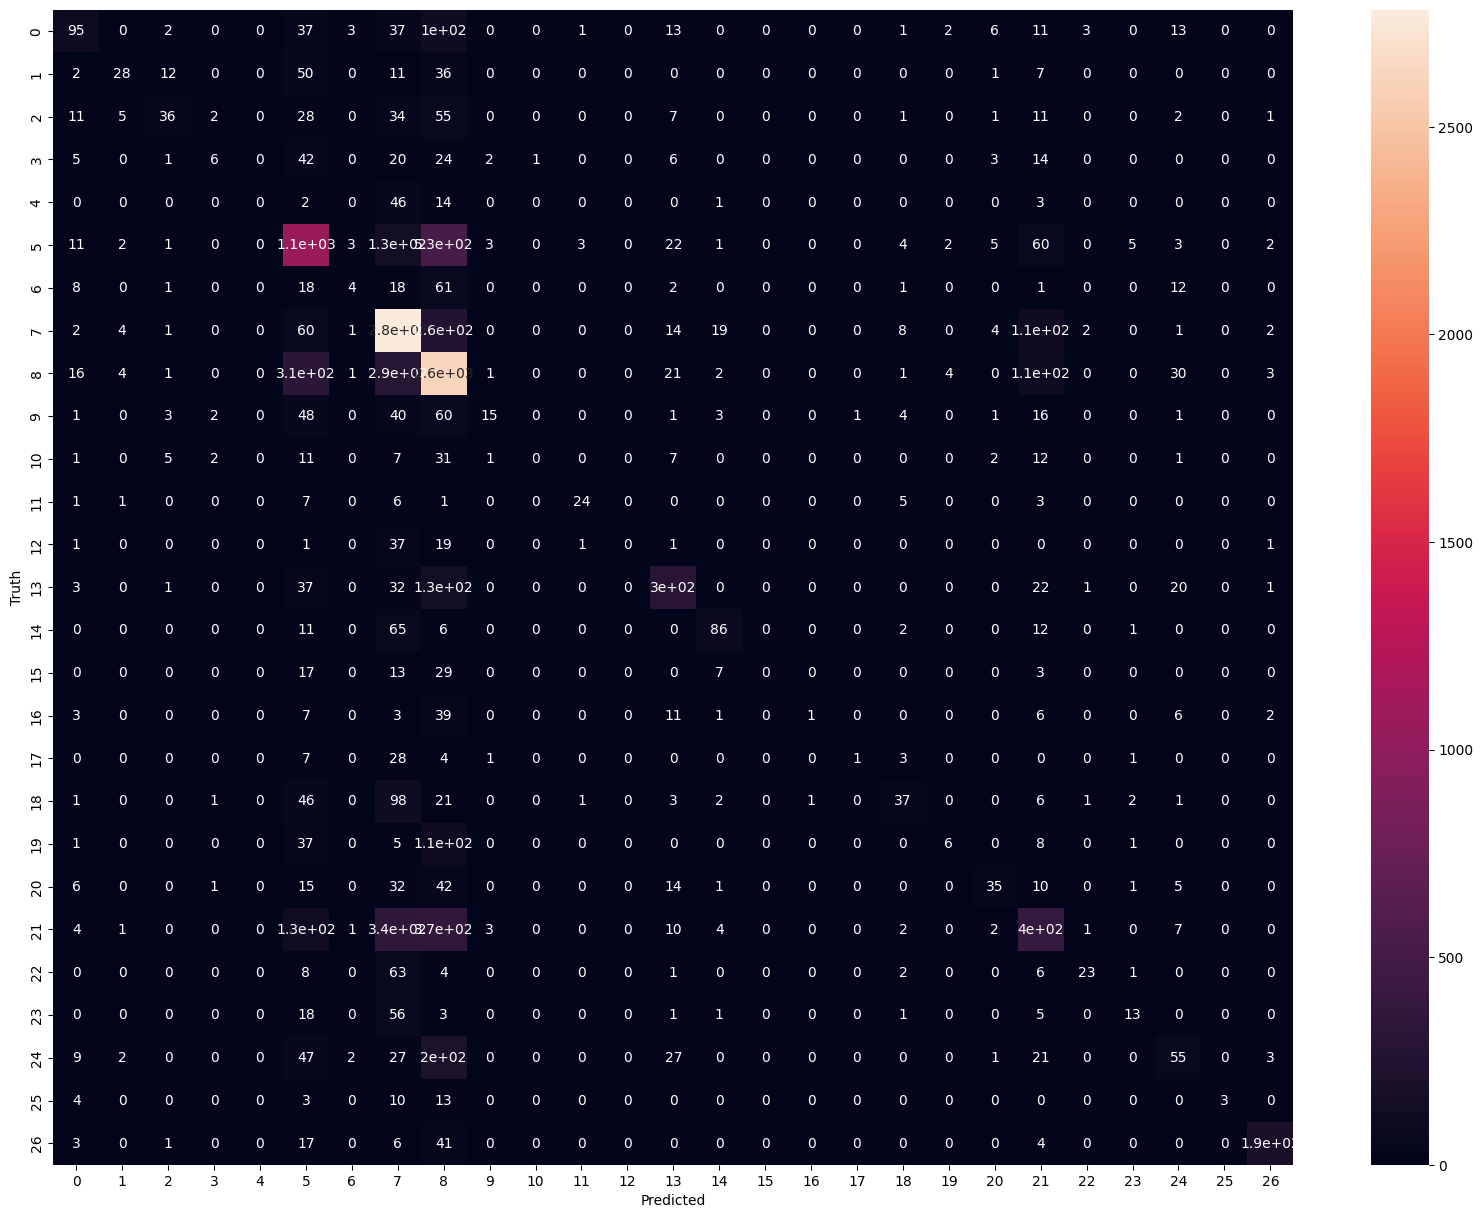

In [ ]:
#Visualising the condfusion matrix in heat map
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(20,15))
ax= sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")